In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import xarray as xr
import cmocean
import pylab as pl

from SVBfunc import haversine



In [124]:
coast = 'smooth'

i=0
varname='dynVars'
pathn='/home/athelandersson/NETCDFs/'+ str(coast) + '_NO/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
pathw='/home/athelandersson/NETCDFs/'+ str(coast) +'/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        
dsw  = xr.open_dataset(pathw)
dsn = xr.open_dataset(pathn)

Ww=dsw.WVEL[0,55,:,:].values
Wn=dsn.WVEL[0,55,:,:].values
time=dsw.time.values.astype(int)
TIMEvel=(time/60)*1e-9


i2=2
varname='dynVars'
pathn2='/home/athelandersson/NETCDFs/'+ str(coast) + '_NO/'+ str(varname)+'noSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
pathw2='/home/athelandersson/NETCDFs/'+ str(coast) +'/'+ str(varname)+'withSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
        
dsw2  = xr.open_dataset(pathw2)
dsn2 = xr.open_dataset(pathn2)

Ww2=dsw2.WVEL[0,55,:,:].values
Wn2=dsn2.WVEL[0,55,:,:].values
time2=dsw2.time.values.astype(int)
TIMEvel2=(time2/60)*1e-9

i2=6
varname='dynVars'
pathn3='/home/athelandersson/NETCDFs/'+ str(coast) + '_NO/'+ str(varname)+'noSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
pathw3='/home/athelandersson/NETCDFs/'+ str(coast) + '/'+ str(varname)+'withSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
        
dsw3  = xr.open_dataset(pathw3)
dsn3 = xr.open_dataset(pathn3)

Ww3=dsw3.WVEL[0,55,:,:].values
Wn3=dsn3.WVEL[0,55,:,:].values
time3=dsw3.time.values.astype(int)
TIMEvel3=(time3/60)*1e-9


pathETA='/home/athelandersson/NETCDFs/' + str(coast) + '/ETA.nc'
dsETA= xr.open_dataset(pathETA)

etafiltall=dsETA.VALfilt.values
LON=dsETA.x.values
LAT=dsETA.y.values
TIME=dsETA.time.values/60
hFacC = dsn.hFacC.values

hfa = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfa)

depth=dsw.Depth.values

In [125]:
coast = 'original'

i=0
varname='dynVars'
pathn='/home/athelandersson/NETCDFs/'+ str(coast) + '_NO/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
pathw='/home/athelandersson/NETCDFs/'+ str(coast) +'/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        
dsw  = xr.open_dataset(pathw)
dsn = xr.open_dataset(pathn)

Wwo=dsw.WVEL[0,55,:,:].values
Wno=dsn.WVEL[0,55,:,:].values
timeo=dsw.time.values.astype(int)
TIMEvelo=timeo*1e-9


i2=2
varname='dynVars'
pathn2='/home/athelandersson/NETCDFs/'+ str(coast) + '_NO/'+ str(varname)+'noSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
pathw2='/home/athelandersson/NETCDFs/'+ str(coast) +'/'+ str(varname)+'withSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
        
dsw2  = xr.open_dataset(pathw2)
dsn2 = xr.open_dataset(pathn2)

Ww2o=dsw2.WVEL[0,55,:,:].values
Wn2o=dsn2.WVEL[0,55,:,:].values
time2o=dsw2.time.values.astype(int)
TIMEvel2o=time2o*1e-9

i2=6
varname='dynVars'
pathn3='/home/athelandersson/NETCDFs/'+ str(coast) + '_NO/'+ str(varname)+'noSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
pathw3='/home/athelandersson/NETCDFs/'+ str(coast) + '/'+ str(varname)+'withSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
        
dsw3  = xr.open_dataset(pathw3)
dsn3 = xr.open_dataset(pathn3)

Ww3o=dsw3.WVEL[0,55,:,:].values
Wn3o=dsn3.WVEL[0,55,:,:].values
time3o=dsw3.time.values.astype(int)
TIMEvel3o=time3o*1e-9


pathETA='/home/athelandersson/NETCDFs/' + str(coast) + '/ETA.nc'
dsETA= xr.open_dataset(pathETA)

etafiltallo=dsETA.VALfilt.values
LONo=dsETA.x.values
LATo=dsETA.y.values
TIMEo=dsETA.time.values
hFacCo = dsn.hFacC.values

hfao = np.ma.masked_values(hFacCo, 0)
masko = np.ma.getmask(hfao)

deptho=dsw.Depth.values

In [142]:
params = {'font.size': 16,
          'figure.figsize': (20, 11),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

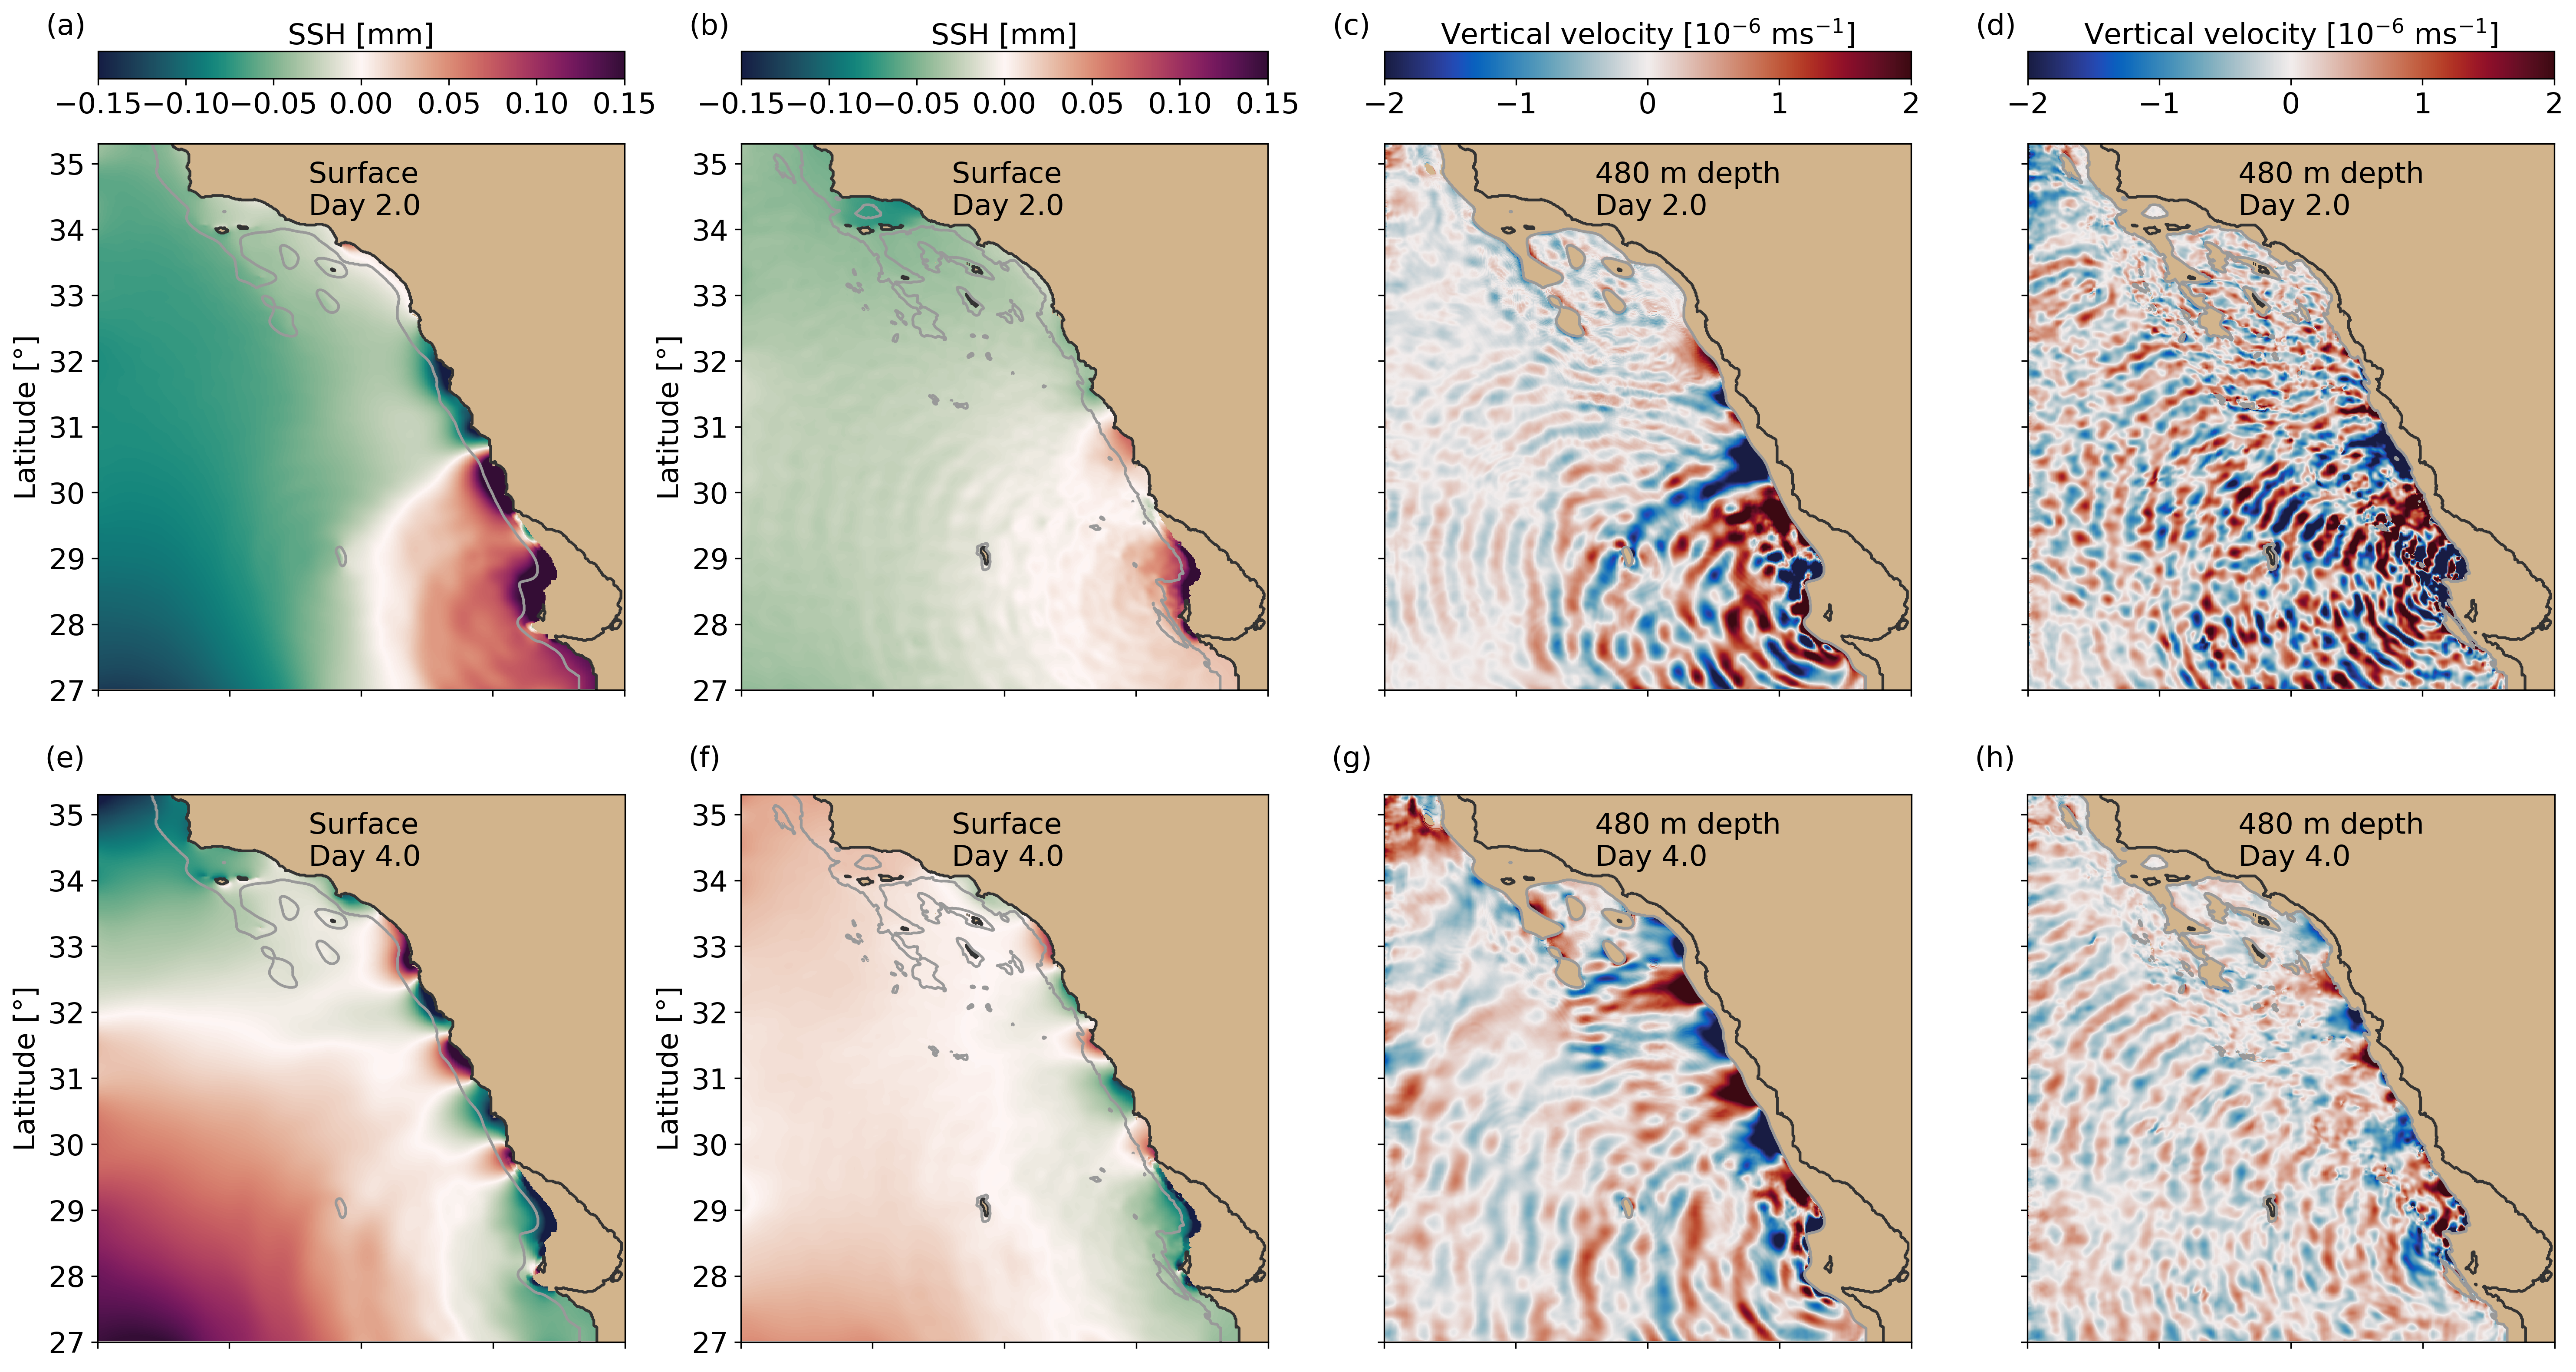

In [145]:


fig = plt.figure()
gs = GridSpec(nrows=2, ncols=4)

vmin=-0.15
vmax=0.15
ind=np.where(TIME==TIMEvel[0])[0][0]
ind2=np.where(TIME==TIMEvel2[0])[0][0]
ind3=np.where(TIME==TIMEvel3[0])[0][0]

indo=np.where(TIMEo==TIMEvelo[0])[0][0]
ind2o=np.where(TIMEo==TIMEvel2o[0])[0][0]
ind3o=np.where(TIMEo==TIMEvel3o[0])[0][0]


xlab='Longitude [°]'
ylab='Latitude [°]'

ax = fig.add_subplot(gs[0,0]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(etafiltall[ind,:,:]*1000, mask=mask[0,:,:]),cmap=cmocean.cm.curl,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth,  colors=['0.2','0.6'], 
                levels=[0,500])


divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('SSH [mm]')

ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)
ax.set( ylabel=ylab)

ax.text(-0.1,1.2, '(a)', transform=ax.transAxes)
ax.text(0.4,0.87, f'Surface \nDay {TIME[ind]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[1,0]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(etafiltall[ind2,:,:]*1000, mask=mask[0,:,:]),cmap=cmocean.cm.curl,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth,  colors=['0.2','0.6'], 
                levels=[0,500])


ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)
ax.set(ylabel=ylab)
cbar_ax.set_label('SSH [mm]')

ax.text(-0.1,1.05, '(e)', transform=ax.transAxes)
ax.text(0.4,0.87, f'Surface \nDay {TIME[ind2]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[0,1]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LONo,LAT,np.ma.masked_array(etafiltallo[indo,:,:]*1000, mask=masko[0,:,:]),cmap=cmocean.cm.curl,vmin=vmin,vmax=vmax)
ax.contour(LONo,LATo,deptho,  colors=['0.2','0.6'], 
                levels=[0,500])


divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('SSH [mm]')

ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)
ax.set( ylabel=ylab)

ax.text(-0.1,1.2, '(b)', transform=ax.transAxes)
ax.text(0.4,0.87, f'Surface \nDay {TIMEo[indo]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[1,1]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LONo,LATo,np.ma.masked_array(etafiltallo[ind2o,:,:]*1000, mask=masko[0,:,:]),cmap=cmocean.cm.curl,vmin=vmin,vmax=vmax)
ax.contour(LONo,LATo,deptho,  colors=['0.2','0.6'], 
                levels=[0,500])


ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)
ax.set(ylabel=ylab)
cbar_ax.set_label('SSH [mm]')

ax.text(-0.1,1.05, '(f)', transform=ax.transAxes)
ax.text(0.4,0.87, f'Surface \nDay {TIMEo[ind2o]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)


vmin=-0.000002*1e6
vmax=0.000002*1e6


ax = fig.add_subplot(gs[0,2]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(Ww-Wn, mask=mask[55,:,:])*1e6,cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth, colors=['0.2','0.6'], 
                levels=[0,500])


divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('Vertical velocity [$10^{-6}$ ms$^{-1}$]')

ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) 
ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)

ax.text(0.4,0.87, f'480 m depth \nDay {TIMEvel[0]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')
ax.text(-0.1,1.2, '(c)', transform=ax.transAxes)

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[1,2]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(Ww2-Wn2, mask=mask[55,:,:])*1e6,cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth, colors=['0.2','0.6'], 
                levels=[0,500])

ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) 
ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)

ax.text(0.4,0.87, f'480 m depth \nDay {TIMEvel2[0]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')
ax.text(-0.1,1.05, '(g)', transform=ax.transAxes)


ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[0,3]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LONo,LATo,np.ma.masked_array(Wwo-Wno, mask=masko[55,:,:])*1e6,cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
ax.contour(LONo,LATo,deptho, colors=['0.2','0.6'], 
                levels=[0,500])


divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('Vertical velocity [$10^{-6}$ ms$^{-1}$]')

ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) 
ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)

ax.text(0.4,0.87, f'480 m depth \nDay {TIMEvelo[0]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')
ax.text(-0.1,1.2, '(d)', transform=ax.transAxes)

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[1,3]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(Ww2o-Wn2o, mask=masko[55,:,:])*1e6,cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
ax.contour(LONo,LATo,deptho, colors=['0.2','0.6'], 
                levels=[0,500])

ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) 
ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)

ax.text(0.4,0.87, f'480 m depth \nDay {TIMEvel2o[0]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')
ax.text(-0.1,1.05, '(h)', transform=ax.transAxes)


ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

plt.tight_layout()
plt.savefig('/home/athelandersson/CTW-analysis/Figures/' + str(coast) + '/fig2Waves.png')


In [91]:
params = {'font.size': 16,
          'figure.figsize': (10, 10),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


/tmp/ipykernel_3964420/3607192556.py:2: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for item in cs.collections:


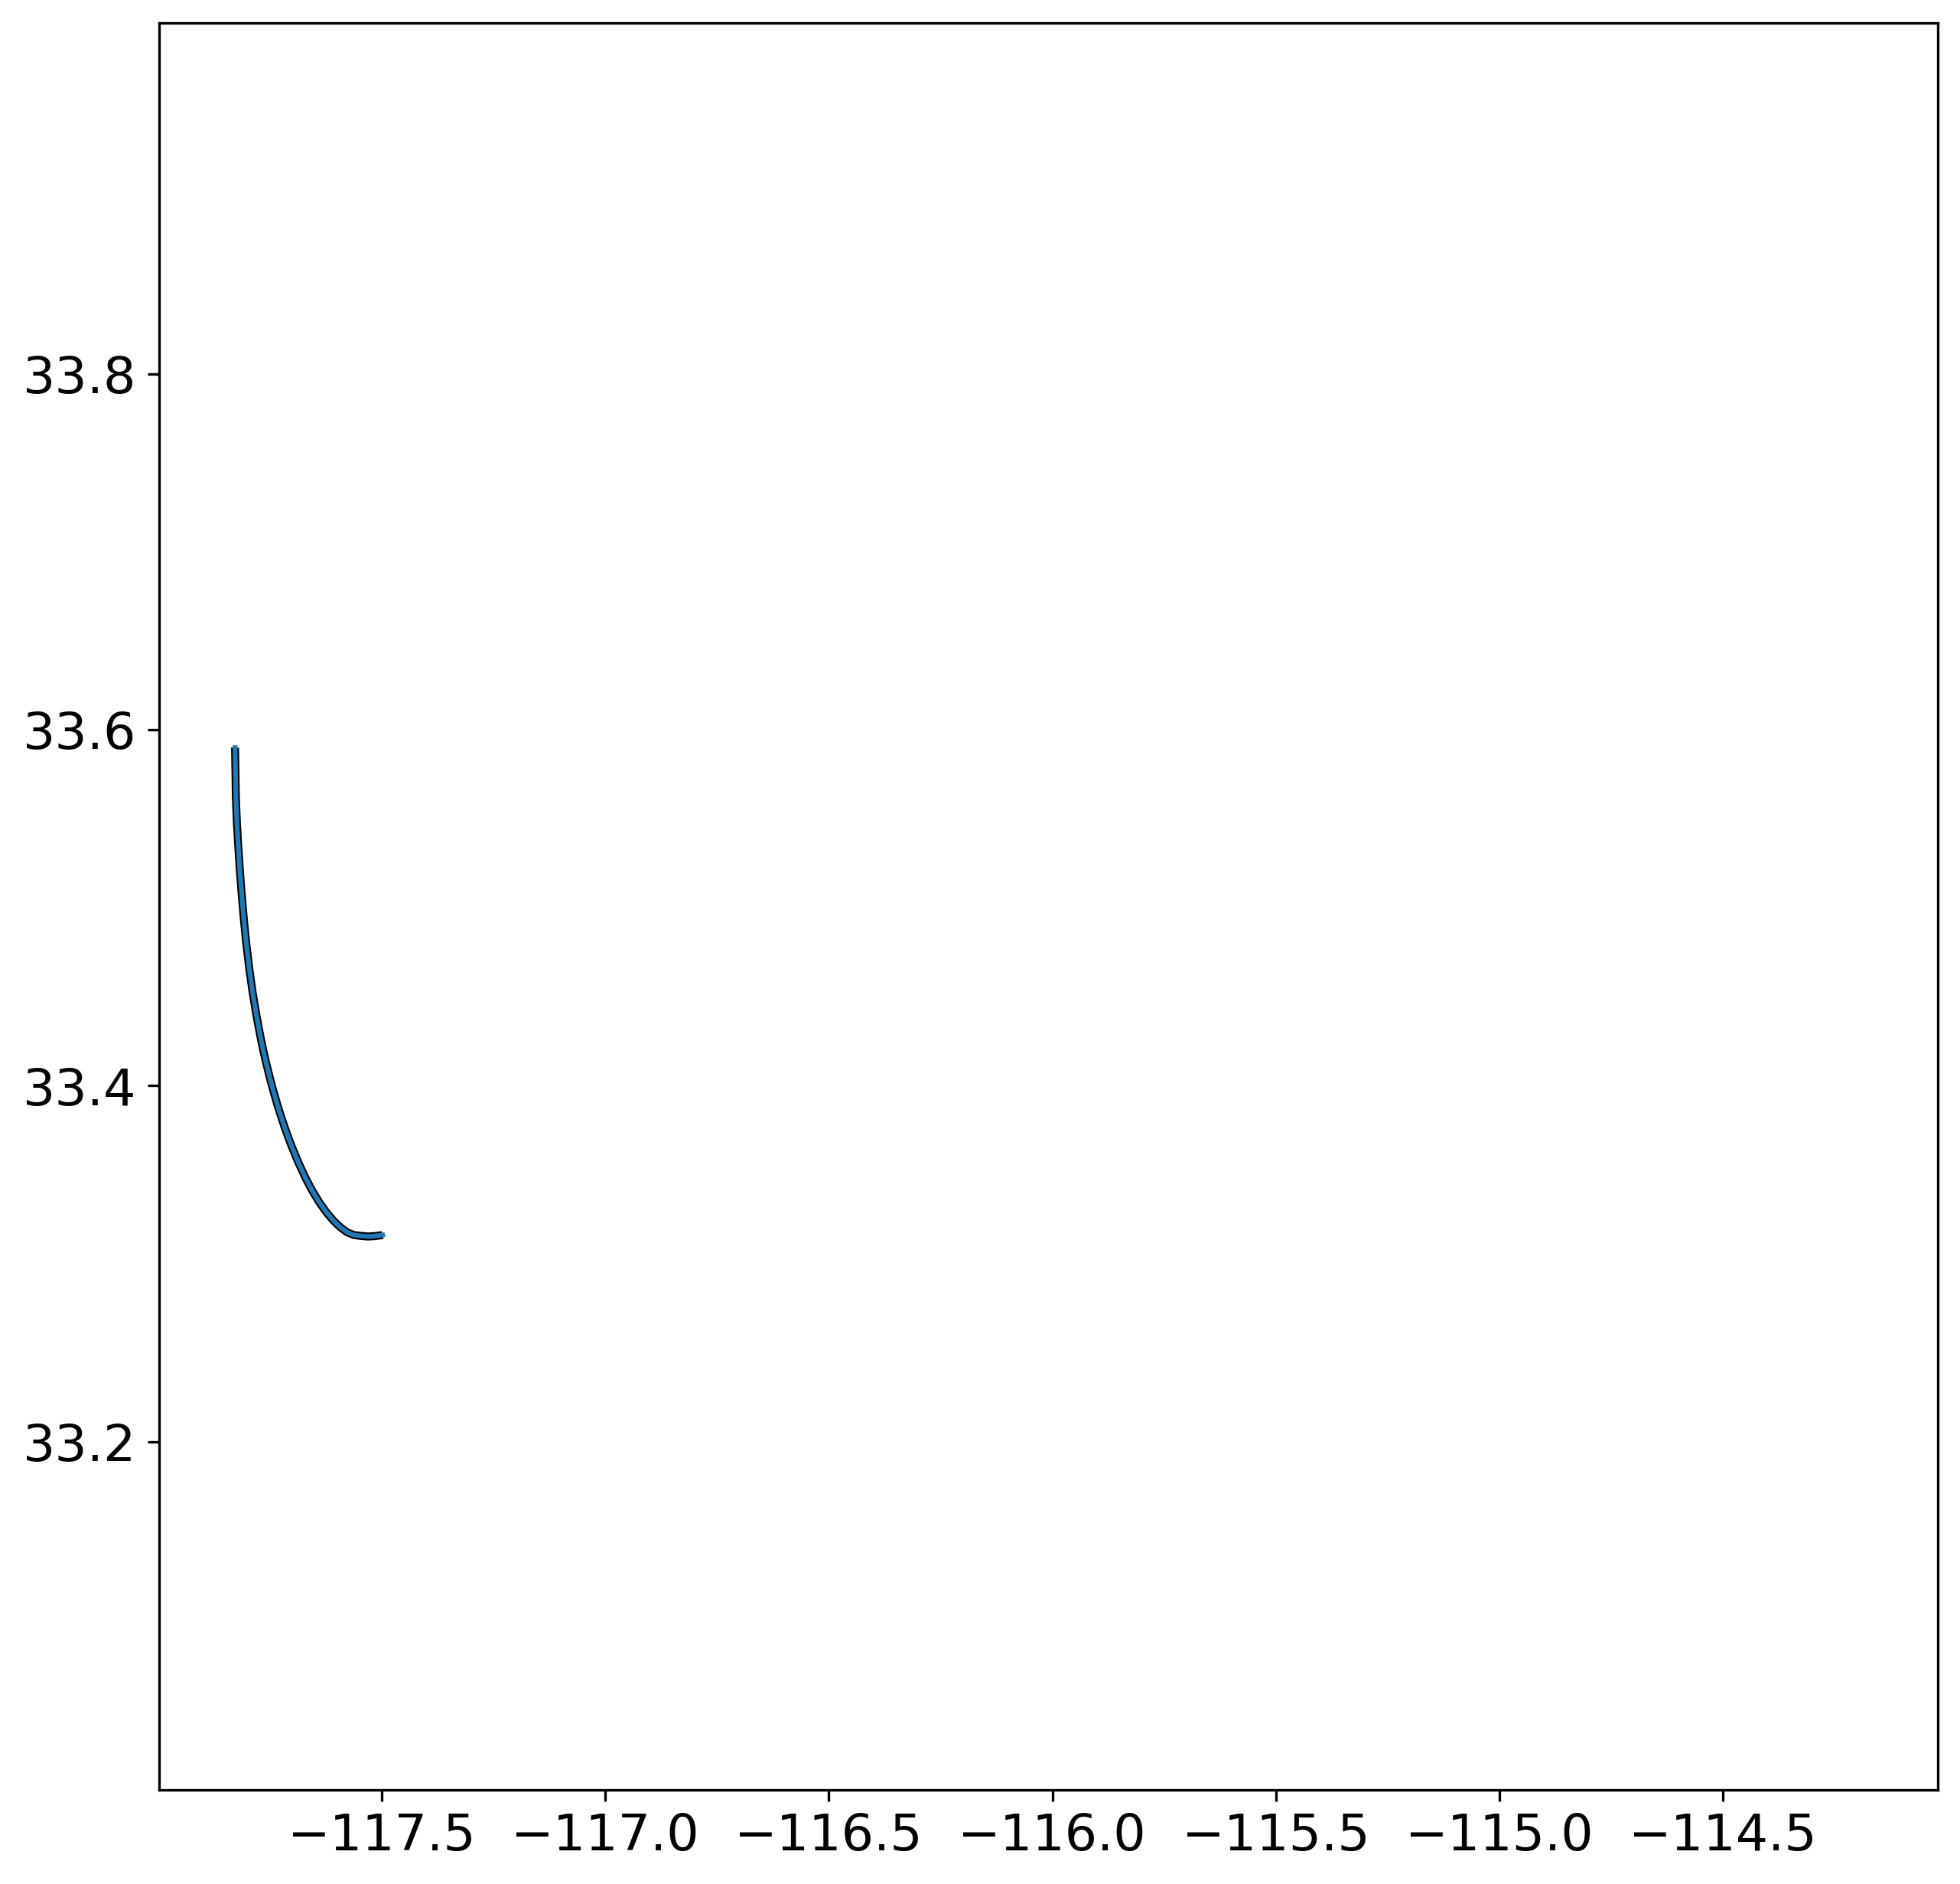

In [107]:
cs =plt.contour(LON[LON>-118],LAT[np.logical_and(LAT>33,LAT<34)],np.ma.masked_array(etafiltall[ind3,:,:]*1000, mask=mask[0,:,:])[np.where(np.logical_and(LAT>33,LAT<34))[0]][:,np.where(LON>-118)[0]], levels=[0.01], colors='black', linewidths=2.5)
for item in cs.collections:
    for i in item.get_paths():
        v = i.vertices
        x = v[:, 0]
        y = v[:, 1]
        plt.plot(x, y)

In [108]:
thick=np.argmin(x)
thin=np.argmax(x)

In [109]:
np.shape(np.ma.masked_array(etafiltall[ind2,:,:]*1000, mask=mask[0,:,:])[np.where(LAT>29)[0]][:,np.where(LON>-117)[0]])

(465, 191)

In [110]:
trapdist=haversine(x[thin], y[thick], x[thick], y[thick])

## Original 

In [41]:
#day 4 close to bay
trapdist

56.210430142895646

In [72]:
#day 4 further from bay
trapdist

76.93057162339886

In [60]:
#day 2 close to bay
trapdist

136.35994120582325

In [64]:
#day 8 middle
trapdist

34.87696942309612

## Smooth

In [84]:
#day 4 furthest from bay
trapdist 

63.551488923443

In [89]:
#day 4 closer to bay ~middle
trapdist

78.63222551640123

In [95]:
#day 4 outside of bay
trapdist

71.8520367689902

In [100]:
#day 8 close to bay ~ middle
trapdist

36.01637929928969

In [105]:
#day 8 further from bay 
trapdist

22.9137465872353

In [111]:
#day 8 reaching the islands
trapdist

30.55205861214138